Q.1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import fetch_lfw_people

In [ ]:
lfw_dataset =  sklearn.datasets.fetch_lfw_people(min_faces_per_person=100)
lfw_dataset

{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

In [ ]:
X= lfw_dataset.data
y= lfw_dataset.target
target_names = lfw_dataset.target_names
y

array([2, 3, 1, ..., 4, 2, 4])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape

(798, 2914)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA

comp=100
pca=PCA(n_components=100)
pca.fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
#X_train_pca.shape
X_train_pca.shape

(798, 100)

In [ ]:
#2914->2
#we need any 3 personalities from the train set
#y=1,2,3

y_train_reduced=[0]*529
#np.empty()
X_train_reduced=np.zeros((529 ,2914))
j=0
for i in range(len(y_train)):
  if y_train[i]==1 or y_train[i]==2 or y_train[i]==3: 
    y_train_reduced[j]=y_train[i] #for j in range(800)
    X_train_reduced[j][:]=X_train[i]
    j=j+1
print(y_train_reduced)
print(X_train_reduced)
print(j)

[3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 

In [ ]:
#100->2
#we need any 3 personalities from the train set
#y=1,2,3

y_train_reduced=[0]*529
#np.empty()
X_train_reduced=np.zeros((529 ,100))
j=0
for i in range(len(y_train)):
  if y_train[i]==1 or y_train[i]==2 or y_train[i]==3: #
    y_train_reduced[j]=y_train[i] #for j in range(800)
    X_train_reduced[j][:]=X_train_pca[i] #here done on PCA  
    j=j+1
print(y_train_reduced)
print(X_train_reduced)
print(j)

[3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2, 1, 3, 2, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #result has 2 features
X_train_tsne = tsne.fit_transform(X_train_reduced)
X_train_tsne

array([[ -6.8460355 ,  20.691391  ],
       [-12.011109  , -17.873232  ],
       [ -4.722683  ,  -8.54963   ],
       ...,
       [-16.936615  ,   4.8970914 ],
       [ 14.809982  ,  -0.69388294],
       [ 11.117944  , -11.022067  ]], dtype=float32)

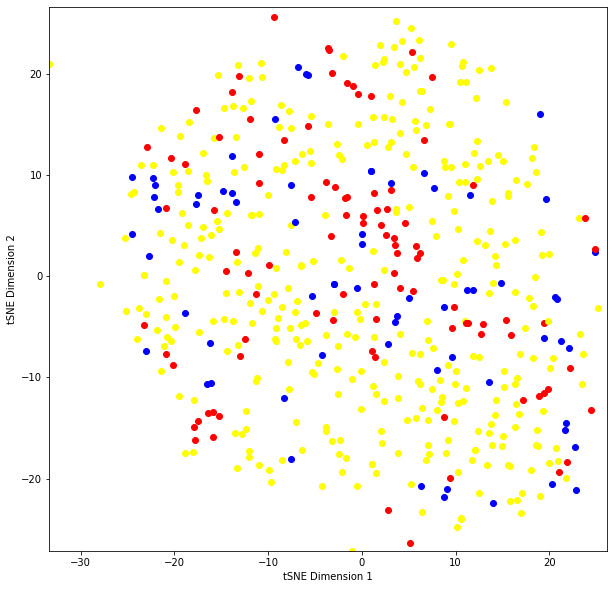

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(X_train_tsne[:, 0].min(), X_train_tsne[:, 0].max() + 1)
plt.ylim(X_train_tsne[:, 1].min(), X_train_tsne[:, 1].max() + 1)

colors=["black", "red", "yellow", "blue"]

for i in range(len(X_train_reduced)):
 # actually plot the digits as text instead of using scatter
 #now do a scatter plot
  plt.scatter(X_train_tsne[i,0],X_train_tsne[i,1],color = colors[y_train_reduced[i]])
  plt.xlabel("tSNE Dimension 1")
  plt.ylabel("tSNE Dimension 2")

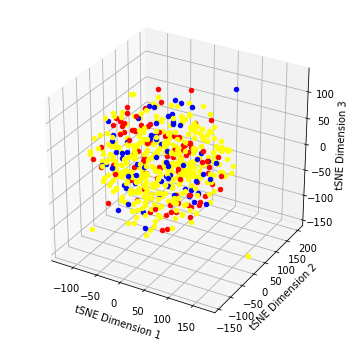

In [ ]:
#tsne to 3D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3) #result has 3 features
X_train_tsne = tsne.fit_transform(X_train_reduced)
X_train_tsne

ax=plt.figure(figsize=(6, 6)).gca(projection='3d')
#plt.xlim(X_train_tsne[:, 0].min(), X_train_tsne[:, 0].max() + 1)
#plt.ylim(X_train_tsne[:, 1].min(), X_train_tsne[:, 1].max() + 1)

colors=["black", "red", "yellow", "blue"]

for i in range(len(X_train_reduced)):
 # actually plot the digits as text instead of using scatter
 #now do a scatter plot
  ax.scatter(X_train_tsne[i,0],X_train_tsne[i,1],X_train_tsne[i,2],color = colors[y_train_reduced[i]])
  ax.set_xlabel("tSNE Dimension 1")
  ax.set_ylabel("tSNE Dimension 2")
  ax.set_zlabel("tSNE Dimension 3")

In [ ]:
#EXTRA
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
X_train_tsne = model.fit_transform(X_train_reduced)
X_train_tsne.shape


(529, 2)

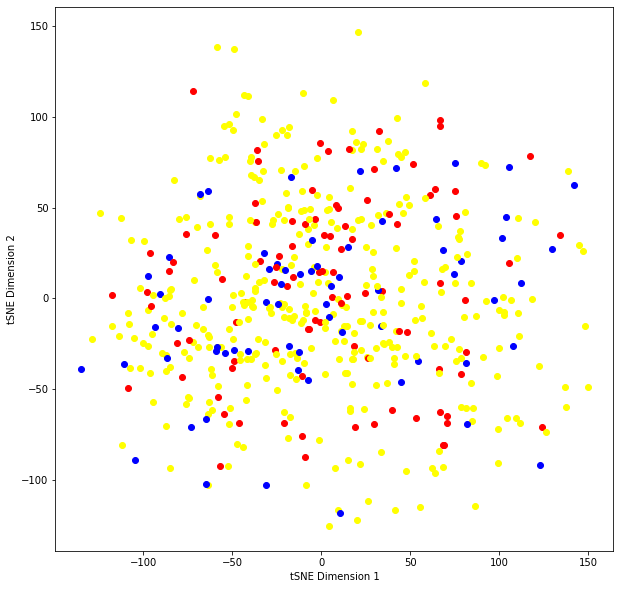

In [ ]:
#EXTRA
plt.figure(figsize=(10, 10))
colors=["black", "red", "yellow", "blue"]

for i in range(len(X_train_tsne)):
  plt.scatter(X_train_tsne[i,0],X_train_tsne[i,1],color = colors[y_train_reduced[i]])
  plt.xlabel("tSNE Dimension 1")
  plt.ylabel("tSNE Dimension 2")
#plot_components(X,
#                model=Isomap(n_components=2))
#images=faces.images[:, ::2, ::2]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 51   1  10   1   1]
 [  5  13   5   0   0]
 [ 21   3 138   2   2]
 [  9   2  12  11   8]
 [  7   2  21   1  16]]
              precision    recall  f1-score   support

           0       0.55      0.80      0.65        64
           1       0.62      0.57      0.59        23
           2       0.74      0.83      0.78       166
           3       0.73      0.26      0.39        42
           4       0.59      0.34      0.43        47

    accuracy                           0.67       342
   macro avg       0.65      0.56      0.57       342
weighted avg       0.68      0.67      0.65       342



In [ ]:
lfw_dataset.images.shape

(1140, 62, 47)

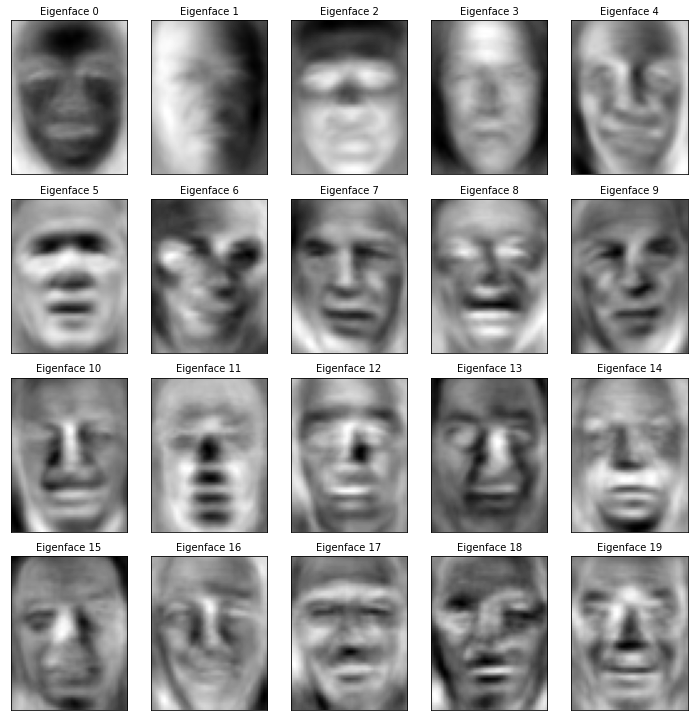

In [ ]:
datapoints, height, width = lfw_dataset.images.shape

eigfaces = pca.components_.reshape((comp, height, width))

def grid(images, titles, height, width, rows=4, cols=5):
    plt.figure(figsize=(2.0 * cols, 2.0 * rows))
    plt.subplots_adjust(bottom=0.1, left=.05, right=.99, top=1.3, hspace=.15)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((height, width)),cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

eig_titles = ["Eigenface %d" %i for i in range(eigfaces.shape[0])]
grid(eigfaces, eig_titles, height, width)

plt.show()

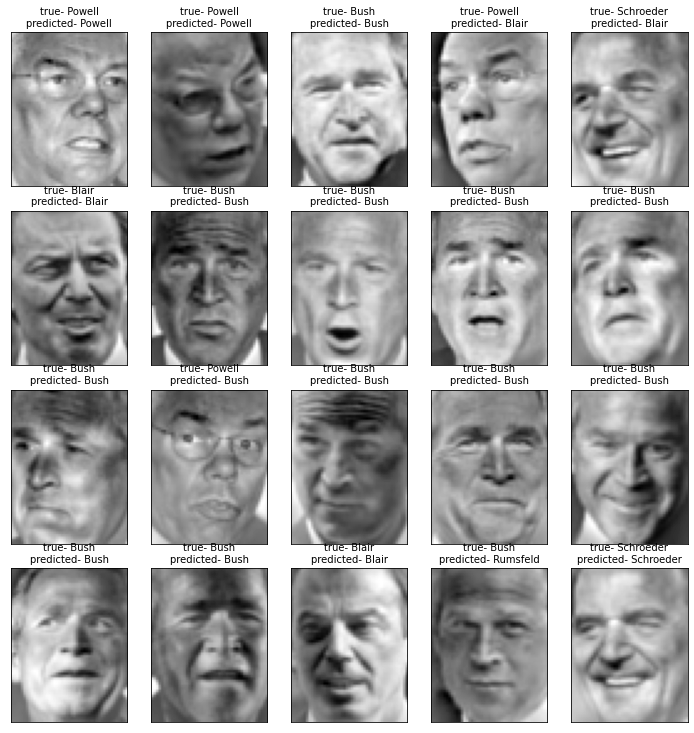

In [ ]:
def title(y_pred, y_test, target_names, i):
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    return 'true- %s\npredicted- %s' % (true_name,pred_name)
pred_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

grid(X_test, pred_titles, height, width)

In [ ]:
eigenvalues = pca.explained_variance_
eigenvalues

array([676.7195   , 469.8914   , 204.56882  , 154.49637  , 105.49057  ,
        82.61897  ,  59.456814 ,  53.25299  ,  49.262733 ,  47.193363 ,
        41.387756 ,  38.874283 ,  33.90793  ,  30.224337 ,  28.0778   ,
        26.979952 ,  25.081358 ,  22.444967 ,  19.874674 ,  19.194452 ,
        18.800543 ,  17.255302 ,  15.921964 ,  15.220203 ,  14.4888315,
        13.655737 ,  13.217369 ,  12.930002 ,  12.1296425,  11.520815 ,
        10.917139 ,  10.713309 ,   9.89657  ,   9.701335 ,   9.472345 ,
         9.140492 ,   8.726917 ,   8.487871 ,   8.143171 ,   8.058321 ,
         7.872614 ,   7.66107  ,   7.5018325,   7.2527537,   7.2083564,
         7.061403 ,   6.9367537,   6.801909 ,   6.3190384,   6.232306 ,
         6.024526 ,   5.9526176,   5.875112 ,   5.680798 ,   5.561528 ,
         5.447706 ,   5.267883 ,   5.1705637,   5.097936 ,   4.9890294,
         4.8148527,   4.7707906,   4.73268  ,   4.6518116,   4.478273 ,
         4.365717 ,   4.3104205,   4.261613 ,   4.1355205,   4.1

In [ ]:
cov_matrix = pca
cov_matrix.fit(X_train)
variance = cov_matrix.explained_variance_ratio_ 
vars=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)
vars #cumulative sum of variance
#Clearly first 31 features give 80.3% variance
#so x=31

array([23.199999, 39.3     , 46.3     , 51.6     , 55.199997, 57.999996,
       59.999996, 61.799995, 63.499996, 65.1     , 66.5     , 67.8     ,
       69.      , 70.      , 71.      , 71.9     , 72.8     , 73.600006,
       74.3     , 75.      , 75.6     , 76.2     , 76.7     , 77.2     ,
       77.7     , 78.2     , 78.7     , 79.1     , 79.5     , 79.9     ,
       80.3     , 80.700005, 81.00001 , 81.30001 , 81.60001 , 81.90002 ,
       82.20002 , 82.50002 , 82.800026, 83.10003 , 83.40003 , 83.700035,
       84.00004 , 84.200035, 84.40003 , 84.60003 , 84.800026, 85.00002 ,
       85.20002 , 85.40002 , 85.60001 , 85.80001 , 86.00001 , 86.200005,
       86.4     , 86.6     , 86.799995, 86.99999 , 87.19999 , 87.39999 ,
       87.59998 , 87.79998 , 87.99998 , 88.199974, 88.39997 , 88.49997 ,
       88.59997 , 88.69997 , 88.799965, 88.89996 , 88.99996 , 89.09996 ,
       89.19996 , 89.29996 , 89.399956, 89.499954, 89.59995 , 89.69995 ,
       89.79995 , 89.89995 , 89.99995 , 90.099945, 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train[:,:31], y_train)
y_pred=classifier.predict(X_test[:,:31])
y_pred

array([0, 0, 1, 3, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 4, 0, 2, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 1,
       2, 0, 0, 0, 4, 2, 0, 1, 0, 0, 3, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 4, 0, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 3,
       0, 0, 2, 0, 4, 0, 0, 0, 0, 2, 2, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       1, 0, 2, 4, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 3, 1, 2, 0, 2, 2, 0, 2, 4, 2, 0,
       1, 2, 0, 2, 0, 2, 0, 4, 2, 4, 1, 2, 2, 1, 2, 2, 1, 3, 0, 2, 1, 2,
       0, 0, 2, 3, 2, 4, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 1, 2, 3, 0, 2,
       1, 0, 2, 0, 1, 2, 2, 2, 2, 4, 0, 2, 2, 2, 0, 2, 0, 2, 2, 4, 0, 0,
       2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 3, 0, 2,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 41   4  13   5   1]
 [  5   7  10   1   0]
 [ 39  15 100   4   8]
 [  5   1  24   8   4]
 [  8   2  30   3   4]]
              precision    recall  f1-score   support

           0       0.42      0.64      0.51        64
           1       0.24      0.30      0.27        23
           2       0.56      0.60      0.58       166
           3       0.38      0.19      0.25        42
           4       0.24      0.09      0.12        47

    accuracy                           0.47       342
   macro avg       0.37      0.36      0.35       342
weighted avg       0.45      0.47      0.44       342

